In [1]:
! pip install autoviz

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [9]:
orig_inputs = np.array ([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872, 0.57533801, 0.31031095, 0.73428138],
        [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266, 0.70790879, 0.63538449, 0.10713163],
        [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183, 0.09165169, 0.59241515, 0.36732026],
        [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283, 0.19742533, 0.7558269 , 0.29247234],
        [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719, 0.28920692, 0.55729515, 0.59388173],
        [0.77881834, 0.0034195, 0.33798313, 0.51952778, 0.82090699, 0.53724669, 0.5513471 , 0.66003209],
        [0.90864932, 0.0622497, 0.23825955, 0.76660355, 0.13233596, 0.99024381, 0.68806782, 0.74249594],
        [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888, 0.74899176, 0.23090707, 0.09791562],
        [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832, 0.30985305, 0.63137968, 0.04195607],
        [0.9849332 , 0.69950626, 0.9988855 , 0.18014846, 0.58014315, 0.23108719, 0.49082694, 0.31368272],
        [0.11207131, 0.43773566, 0.59659878, 0.59277563, 0.22698177, 0.41010452, 0.92123758, 0.67475276],
        [0.79188751, 0.57619134, 0.69452836, 0.28342378, 0.13675546, 0.27916186, 0.84276726, 0.62532792],
        [0.1435503 , 0.93741452, 0.23232482, 0.00904349, 0.41457893, 0.40932517, 0.55377852, 0.2058408],
        [0.76991655, 0.45875909, 0.55900044, 0.69460444, 0.50319902, 0.72834638, 0.78425353, 0.66313109],
        [0.05644741, 0.06595555, 0.02292868, 0.03878647, 0.40393544, 0.80105533, 0.48830701, 0.89308498],
        [0.86243745, 0.48273382, 0.2818694 , 0.54410223, 0.88749026, 0.38265469, 0.60190199, 0.47646169],
        [0.3515119 , 0.59006494, 0.9094363 , 0.67840835, 0.21282566, 0.08846038, 0.410153  , 0.19572429],
        [0.73590364, 0.03461189, 0.72803027, 0.14742652, 0.29574314, 0.44511731, 0.97517969, 0.37433978],
        [0.68029397, 0.25510465, 0.86218799, 0.13439582, 0.3263292, 0.28790687, 0.43501048, 0.36420013],
        [0.04432925, 0.01358149, 0.25819824, 0.57764416, 0.05127992, 0.15856307, 0.59103012, 0.07795293],
        [0.77834548, 0.75114565, 0.31414221, 0.90298577, 0.33538166, 0.38632267, 0.74897249, 0.9887551],
        [0.89888711, 0.5236417 , 0.87678325, 0.21869645, 0.90026089, 0.28276624, 0.91107791, 0.47239822],
        [0.14512029, 0.11932754, 0.42088822, 0.38760861, 0.15542283, 0.87517163, 0.51055967, 0.72861058],
        [0.33895442, 0.56693202, 0.3767511, 0.09891573, 0.65945169, 0.24554809, 0.76248278, 0.73215347],
        [0.17615002, 0.29396143, 0.97567997, 0.79393631, 0.92340076, 0.03084229, 0.80325452, 0.59589758],
        [0.02894663, 0.02827906, 0.48137155, 0.6131746 , 0.67266045, 0.02211341, 0.6014833, 0.52488505],
        [0.19263987, 0.63067728, 0.41679584, 0.49052929, 0.79608602, 0.65456706, 0.27624119, 0.29551759],
        [0.94318502, 0.21885062, 0.72118408, 0.42459707, 0.986902, 0.53518298, 0.71474318, 0.96009372],
        [0.5327214 , 0.8336926 , 0.071399, 0.11681148, 0.73069311, 0.93737559, 0.86650798, 0.127902  ],
        [0.44709584, 0.84395253, 0.72954612, 0.63915138, 0.40928714, 0.13264569, 0.03590888, 0.44683847],
        [0.38222497, 0.55713584, 0.85310163, 0.33379569, 0.26572127, 0.48087292, 0.23764706, 0.76863196],
        [0.53281953, 0.86230848, 0.53826712, 0.04944293, 0.71970119, 0.9067059 , 0.10823094, 0.52534791],
        [0.39486519, 0.33180167, 0.7407543 , 0.69786172, 0.73740444, 0.78377681, 0.25449546, 0.87114551],
        [0.98594539, 0.87305363, 0.07039262, 0.05358729, 0.73415296, 0.52025852, 0.81104004, 0.10336036],
        [0.96457339, 0.97397979, 0.66375335, 0.66221599, 0.67312167, 0.90523762, 0.45887462, 0.5609175 ],
        [0.47207071, 0.16820264, 0.08642757, 0.45265551, 0.48061922, 0.62243949, 0.92897446, 0.11253627],
        [0.85600695, 0.6388937 , 0.32619202, 0.66850311, 0.24029837, 0.21029889, 0.16754636, 0.96358986],
        [0.81003174, 0.63504604, 0.26954758, 0.86960534, 0.66192159, 0.25225873, 0.76567003, 0.89054867],
        [0.79625252, 0.00703653, 0.35569738, 0.48756605, 0.74051962, 0.70665010, 0.99291449, 0.38173437],
        [0.48124533, 0.10246072, 0.21948594, 0.67732237, 0.24750919, 0.24434086, 0.16382453, 0.71596164],
        [0.31412191, 0.13502751, 0.59044281, 0.94903970, 0.05313537, 0.97047885, 0.81308347, 0.62434362],
        [0.75922717, 0.59701731, 0.96706059, 0.19282897, 0.61852729, 0.70313113, 0.72158054, 0.26410921],
        [0.21710131, 0.24491513, 0.33832110, 0.18066512, 0.18311756, 0.32622381, 0.99549019, 0.43828718],
        [0.84224260, 0.75080397, 0.08967149, 0.07753885, 0.60628273, 0.96448816, 0.40479430, 0.34884520],
        [0.26152404, 0.66703483, 0.77249656, 0.95691959, 0.78432753, 0.41064356, 0.81851493, 0.55903701],
        [0.78257059, 0.79426946, 0.04163799, 0.61165619, 0.17310007, 0.61145922, 0.30226197, 0.03114252],
        [0.43306229, 0.13706236, 0.58553888, 0.23284215, 0.43636386, 0.86378873, 0.61843230, 0.57716657],
        [0.71743724, 0.04646644, 0.58190968, 0.55501585, 0.96341122, 0.00821276, 0.82284594, 0.39816868],
        [0.96265418, 0.60498179, 0.66553887, 0.59802506, 0.73395036, 0.21554961, 0.83476125, 0.47750574],
        [0.83648618, 0.59223870, 0.60481445, 0.87167105, 0.06475259, 0.94181654, 0.18202880, 0.87179807],
        [0.05551500, 0.25585794, 0.00084777, 0.37678618, 0.50900495, 0.21516139, 0.87518114, 0.30841419],
        [0.04343225, 0.10004702, 0.22342261, 0.01686426, 0.28000728, 0.36384718, 0.32840638, 0.83239639],
        [0.65116448, 0.36771347, 0.17058021, 0.05053715, 0.10943459, 0.40735138, 0.25028503, 0.88840798],
        [0.57134259, 0.58373598, 0.31672936, 0.83670872, 0.45709021, 0.21672051, 0.59691357, 0.34820606],
        [0.39864110, 0.51405171, 0.32944982, 0.48072035, 0.71967069, 0.07559504, 0.50629244, 0.33463235],
        [0.39502561, 0.40603148, 0.31738856, 0.15842830, 0.95077025, 0.76540465, 0.70524418, 0.61006510],
        [0.82321952, 0.57955844, 0.47378997, 0.41932445, 0.06151819, 0.55667450, 0.49405923, 0.26332807],
        [0.60641630, 0.60750891, 0.92822057, 0.58576799, 0.27097970, 0.91807203, 0.36744600, 0.57693699],
        [0.16122769, 0.66870972, 0.05982608, 0.59734287, 0.17457308, 0.43314802, 0.00321444, 0.29389698],
        [0.21195968, 0.02074541, 0.45101591, 0.69575735, 0.06172169, 0.12280220, 0.60744652, 0.07086501],
        [0.71521679, 0.02832287, 0.99780488, 0.81553799, 0.54182957, 0.48146515, 0.31331951, 0.20437228],
        [0.23194803, 0.52111803, 0.12886932, 0.46476963, 0.43442261, 0.01565881, 0.67717660, 0.96067467],
        [0.51873586, 0.97589978, 0.21108288, 0.81311735, 0.99476520, 0.89186001, 0.29649214, 0.88175486],
        [0.23702418, 0.70530467, 0.38718611, 0.05217465, 0.44492155, 0.84059423, 0.24534168, 0.11067510],
        [0.02599124, 0.24369067, 0.99437425, 0.07253572, 0.54490732, 0.64134257, 0.55025561, 0.13304017],
        [0.48025613, 0.80415960, 0.47786905, 0.29009182, 0.71902977, 0.83929694, 0.69557076, 0.51209755],
        [0.30501851, 0.93573922, 0.49561086, 0.48451729, 0.55968010, 0.08413144, 0.66208737, 0.30273765],
        [0.79931812, 0.02481222, 0.71222101, 0.14658437, 0.01930307, 0.31538248, 0.92827831, 0.11625890],
        [0.34745494, 0.88941075, 0.33104542, 0.74680421, 0.54667914, 0.82494349, 0.36462573, 0.23472655],
        [0.23927489, 0.96216338, 0.32394688, 0.60328219, 0.23414741, 0.05573627, 0.70411902, 0.96701128],
        [0.65122570, 0.16211732, 0.13206297, 0.68938819, 0.99311242, 0.51952382, 0.65111534, 0.61567683],
        [0.01593524, 0.01663874, 0.47347296, 0.09364429, 0.71067413, 0.68274011, 0.83250194, 0.01651770],
        [0.83082712, 0.89820514, 0.58321575, 0.49739566, 0.61587817, 0.47925311, 0.37704664, 0.78108160],
        [0.29212834, 0.08283856, 0.34265159, 0.59953963, 0.28583096, 0.23984272, 0.94696981, 0.24173834],
        [0.60279361, 0.96217201, 0.89493838, 0.03562571, 0.10545264, 0.88713768, 0.33300622, 0.08541830],
        [0.66338487, 0.40294691, 0.91643683, 0.38647627, 0.18246363, 0.06197539, 0.89619618, 0.52292248],
        [0.71415628, 0.88418175, 0.64381258, 0.63428988, 0.89764549, 0.77910916, 0.79994683, 0.27904511],
        [0.83363393, 0.01191760, 0.40360061, 0.73703095, 0.11666705, 0.63233604, 0.91460618, 0.08005615],
        [0.00554017, 0.36747789, 0.55228285, 0.65259371, 0.05334086, 0.94646512, 0.96975450, 0.82020509],
        [0.94172092, 0.04551294, 0.95383975, 0.85300803, 0.93944963, 0.99935421, 0.76073750, 0.60568160]])
len(orig_inputs)

In [11]:
orig_inputs

array([[6.0499445e-01, 2.9221502e-01, 9.0845275e-01, 3.5550624e-01,
        2.0166872e-01, 5.7533801e-01, 3.1031095e-01, 7.3428138e-01],
       [1.7800696e-01, 5.6622265e-01, 9.9486184e-01, 2.1032501e-01,
        3.2015266e-01, 7.0790879e-01, 6.3538449e-01, 1.0713163e-01],
       [9.0769800e-03, 8.1162615e-01, 5.2052036e-01, 7.5686680e-02,
        2.6511183e-01, 9.1651690e-02, 5.9241515e-01, 3.6732026e-01],
       [5.0602816e-01, 6.5373012e-01, 3.6341078e-01, 1.7798105e-01,
        9.3728300e-02, 1.9742533e-01, 7.5582690e-01, 2.9247234e-01],
       [3.5990926e-01, 2.4907568e-01, 4.9599717e-01, 7.0921498e-01,
        1.1498719e-01, 2.8920692e-01, 5.5729515e-01, 5.9388173e-01],
       [7.7881834e-01, 3.4195000e-03, 3.3798313e-01, 5.1952778e-01,
        8.2090699e-01, 5.3724669e-01, 5.5134710e-01, 6.6003209e-01],
       [9.0864932e-01, 6.2249700e-02, 2.3825955e-01, 7.6660355e-01,
        1.3233596e-01, 9.9024381e-01, 6.8806782e-01, 7.4249594e-01],
       [5.8637144e-01, 8.8073573e-01, 7.4

In [23]:
# Add the new data points
new_data = np.array([[0.027672, 0.609423, 0.22585 , 0.085386, 0.735948, 0.457442, 0.136238, 0.116908],
                     [0.050125, 0.008466, 0.035075, 0.017715, 0.087118, 0.64233, 0.481399, 0.753514],
                     [0.25, 0.39, 0.175, 0.825, 0.55, 0.85, 0.35, 0.25],
                     [0.009472, 0.538286, 0.092905, 0.65492 , 0.648623, 0.908216, 0.52219 , 0.578499],
                     [0.023086, 0.539044, 0.101911, 0.161404, 0.707108, 0.397252, 0.564606, 0.887186],
                     [0.017337, 0.54519 , 0.032002, 0.18009 , 0.693442, 0.3188, 0.568236, 0.906174],
                     [0.020389, 0.596291, 0.209898, 0.501572, 0.663481, 0.560284, 0.518104, 0.869224],
                     [0.068541, 0.27555 , 0.214531, 0.506625, 0.195037, 0.493248, 0.940523, 0.978878]])
inputs = np.vstack([orig_inputs, new_data])

len(orig_inputs), len(inputs)

(80, 88)

In [25]:
orig_outputs = np.array ([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525])

In [15]:
sec_outputs = np.load ("../../initial_data2/function_8/initial_outputs.npy")


In [39]:
sec_outputs

array([7.38153659, 6.21406582, 8.34373778, 8.20235493, 7.0175736 ,
       8.15436185, 8.59988062, 7.41496438, 6.35307753, 7.04891614,
       8.83964993, 9.75508539, 9.069804  , 8.33091139, 9.08235861,
       9.06259425, 7.88211016, 6.8055637 , 9.22168616, 8.57638926,
       6.45101025, 8.95855365, 8.30868114, 9.23898119, 7.41316123,
       8.28986748, 8.14792352, 6.56627417, 8.64815107, 8.10407818,
       8.67513919, 8.73943795, 7.55172428, 8.25528511, 6.61336583,
       6.03732966, 6.86721166, 7.03597564, 7.47931514, 5.15380413])

In [43]:
orig_outputs = np.append(orig_outputs, sec_outputs)
orig_outputs

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525,
       7.38153659, 6.21406582, 8.34373778, 8.20235493, 7.0175736 ,
       8.15436185, 8.59988062, 7.41496438, 6.35307753, 7.04891614,
       8.83964993, 9.75508539, 9.069804  , 8.33091139, 9.08235861,
       9.06259425, 7.88211016, 6.8055637 , 9.22168616, 8.57638926,
       6.45101025, 8.95855365, 8.30868114, 9.23898119, 7.41316123,
       8.28986748, 8.14792352, 6.56627417, 8.64815107, 8.10407818,
       8.67513919, 8.73943795, 7.55172428, 8.25528511, 6.61336

In [27]:
outputs = np.append(orig_outputs, sec_outputs)
outputs = np.append(outputs, 9.7113997053566)
outputs = np.append(outputs, 9.4953758564104)
outputs = np.append(outputs, 9.2247)
outputs = np.append(outputs, 9.1880141989404)
outputs = np.append(outputs, 9.5453219486254)
outputs = np.append(outputs, 9.4813617897484)
outputs = np.append(outputs, 9.4228132330949)
outputs = np.append(outputs, 8.5395008134951)
len(outputs)

88

In [45]:
orig_data = {'feature1': orig_inputs[:,0],
             'feature2': orig_inputs[:,1],
             'feature3': orig_inputs[:,2],
             'feature4': orig_inputs[:,3],
             'feature5': orig_inputs[:,4],
             'feature6': orig_inputs[:,5],
             'feature7': orig_inputs[:,6],
             'feature8': orig_inputs[:,7],
             'target': orig_outputs
       }

orig_df = pd.DataFrame(orig_data)
orig_df

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
..       ...       ...       ...       ...       ...       ...       ...   
75  0.663385  0.402947  0.916437  0.386476  0.182464  0.061975  0.896196   
76  0.714156  0.884182  0.643813  0.634290  0.897645  0.779109  0.799947   
77  0.833634  0.011918  0.403601  0.737031  0.116667  0.632336  0.914606   
78  0.005540  0.367478  0.552283  0.652594  0.053341  0.946465  0.969754   
79  0.941721  0.045513  0.953840  0.853008  0.939450  0.999354  0.760737   

    feature8    target  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
..       ...       ...  
75  0.522922  6.037330  
76  0.279045  6.867212  
77  0.080056  7.035976  
78  0.820205  7.479315  
79  0.605682  5.153804  

[80 rows x 9 columns]

In [47]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'feature5': inputs[:,4],
        'feature6': inputs[:,5],
        'feature7': inputs[:,6],
        'feature8': inputs[:,7],
        'target': outputs
       }

df = pd.DataFrame(data)
df

feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0   0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311   
1   0.178007  0.566223  0.994862  0.210325  0.320153  0.707909  0.635384   
2   0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415   
3   0.506028  0.653730  0.363411  0.177981  0.093728  0.197425  0.755827   
4   0.359909  0.249076  0.495997  0.709215  0.114987  0.289207  0.557295   
..       ...       ...       ...       ...       ...       ...       ...   
83  0.009472  0.538286  0.092905  0.654920  0.648623  0.908216  0.522190   
84  0.023086  0.539044  0.101911  0.161404  0.707108  0.397252  0.564606   
85  0.017337  0.545190  0.032002  0.180090  0.693442  0.318800  0.568236   
86  0.020389  0.596291  0.209898  0.501572  0.663481  0.560284  0.518104   
87  0.068541  0.275550  0.214531  0.506625  0.195037  0.493248  0.940523   

    feature8    target  
0   0.734281  7.398721  
1   0.107132  7.005227  
2   0.367320  8.459482  
3   0.292472  8.284008  
4   0.593882  8.606117  
..       ...       ...  
83  0.578499  9.188014  
84  0.887186  9.545322  
85  0.906174  9.481362  
86  0.869224  9.422813  
87  0.978878  8.539501  

[88 rows x 9 columns]

In [49]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = orig_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [51]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  88 non-null     float64
 1   feature2  88 non-null     float64
 2   feature3  88 non-null     float64
 3   feature4  88 non-null     float64
 4   feature5  88 non-null     float64
 5   feature6  88 non-null     float64
 6   feature7  88 non-null     float64
 7   feature8  88 non-null     float64
 8   target    88 non-null     float64
dtypes: float64(9)
memory usage: 6.3 KB


In [55]:
orig_df.describe()

feature1   feature2   feature3   feature4   feature5   feature6  \
count  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
mean    0.511004   0.468555   0.501298   0.454135   0.461375   0.496422   
std     0.298973   0.316386   0.283653   0.274177   0.295377   0.300706   
min     0.005540   0.003419   0.000848   0.009043   0.009649   0.008213   
25%     0.238712   0.155854   0.316083   0.180536   0.197031   0.243216   
50%     0.525729   0.522380   0.475830   0.489048   0.440643   0.480063   
75%     0.779756   0.716679   0.722896   0.670708   0.719190   0.768831   
max     0.985945   0.975900   0.998885   0.956920   0.994765   0.999354   

        feature7   feature8     target  
count  80.000000  80.000000  80.000000  
mean    0.591691   0.473226   7.831286  
std     0.255891   0.281661   1.007005  
min     0.003214   0.016518   5.153804  
25%     0.374646   0.257931   7.097322  
50%     0.612939   0.474430   7.967780  
75%     0.805201   0.685055   8.601440  
max     0.995490   0.988755   9.755085

In [57]:
df.describe()

feature1   feature2   feature3   feature4   feature5   feature6  \
count  88.000000  88.000000  88.000000  88.000000  88.000000  88.000000   
mean    0.469852   0.465757   0.468079   0.446176   0.468076   0.503879   
std     0.314338   0.307272   0.291105   0.275497   0.291114   0.293639   
min     0.005540   0.003419   0.000848   0.009043   0.009649   0.008213   
25%     0.188982   0.166681   0.230706   0.179563   0.200011   0.250581   
50%     0.476163   0.530964   0.418842   0.489048   0.468855   0.481169   
75%     0.772024   0.676409   0.698952   0.663788   0.712763   0.768831   
max     0.985945   0.975900   0.998885   0.956920   0.994765   0.999354   

        feature7   feature8     target  
count  88.000000  88.000000  88.000000  
mean    0.584279   0.490891   7.967175  
std     0.253239   0.289224   1.057362  
min     0.003214   0.016518   5.153804  
25%     0.374646   0.259996   7.257810  
50%     0.599198   0.494802   8.151143  
75%     0.800774   0.732685   8.820855  
max     0.995490   0.988755   9.755085

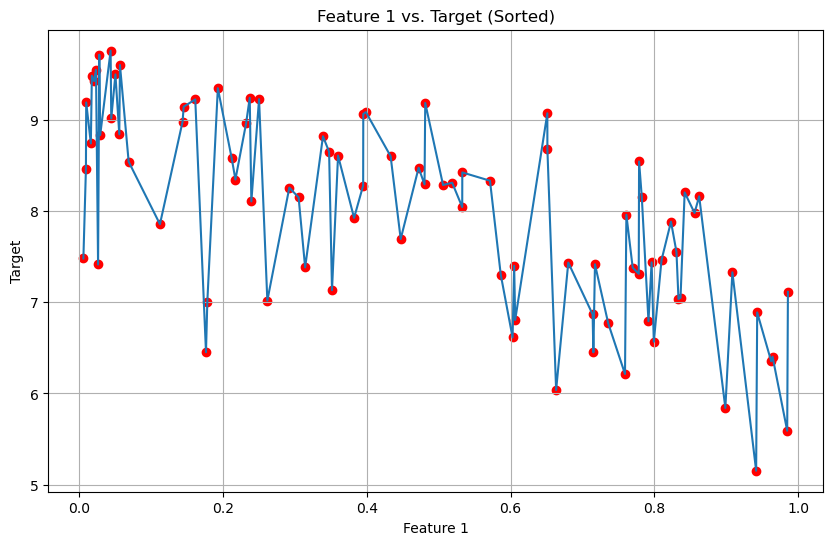

In [59]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

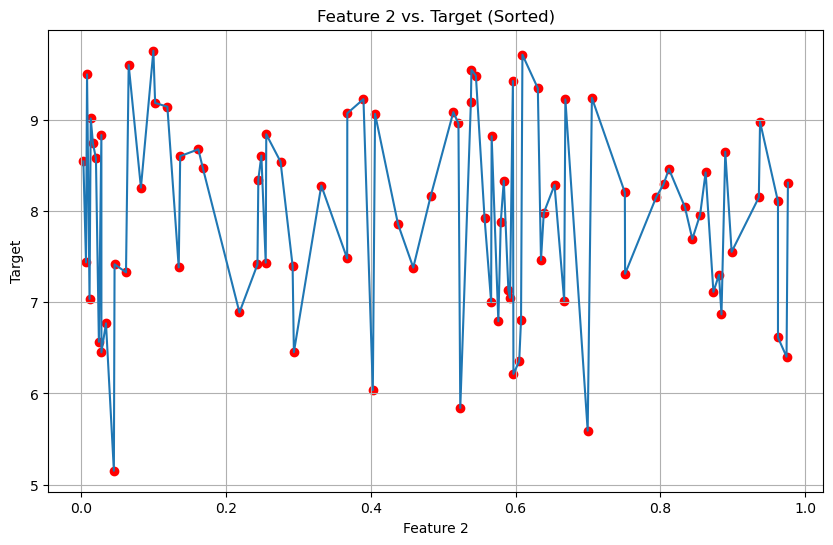

In [61]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

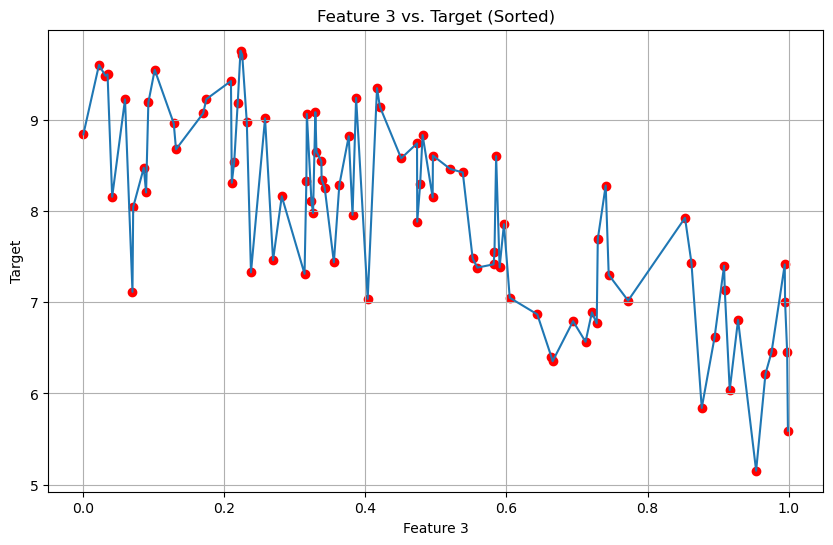

In [63]:
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [65]:
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [67]:
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target (Sorted)')
plt.grid(True)
plt.show()

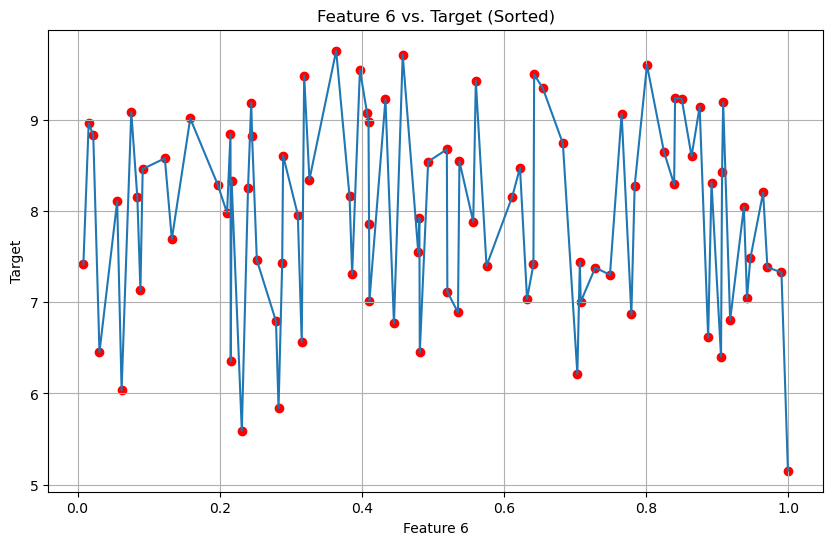

In [69]:
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target (Sorted)')
plt.grid(True)
plt.show()

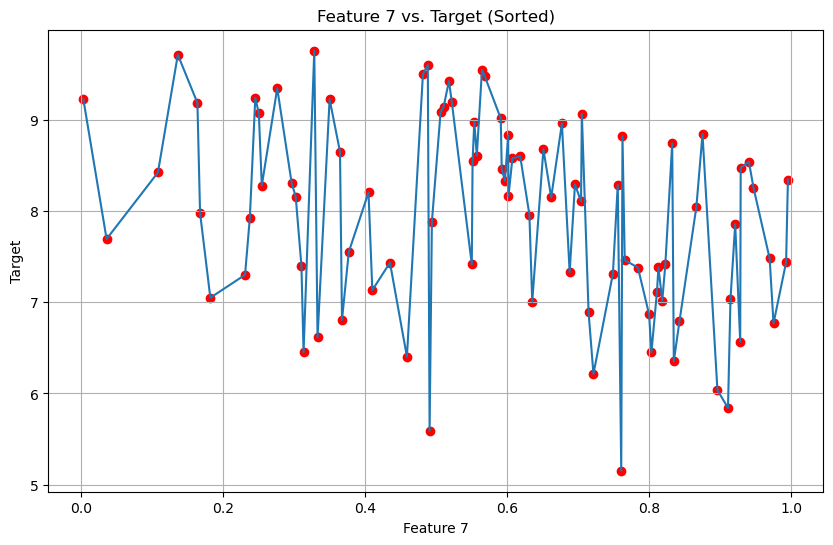

In [71]:
# Sort the DataFrame by 'feature7'
df_sorted = df.sort_values('feature7')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature7'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature7'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 7')
plt.ylabel('Target')
plt.title('Feature 7 vs. Target (Sorted)')
plt.grid(True)
plt.show()

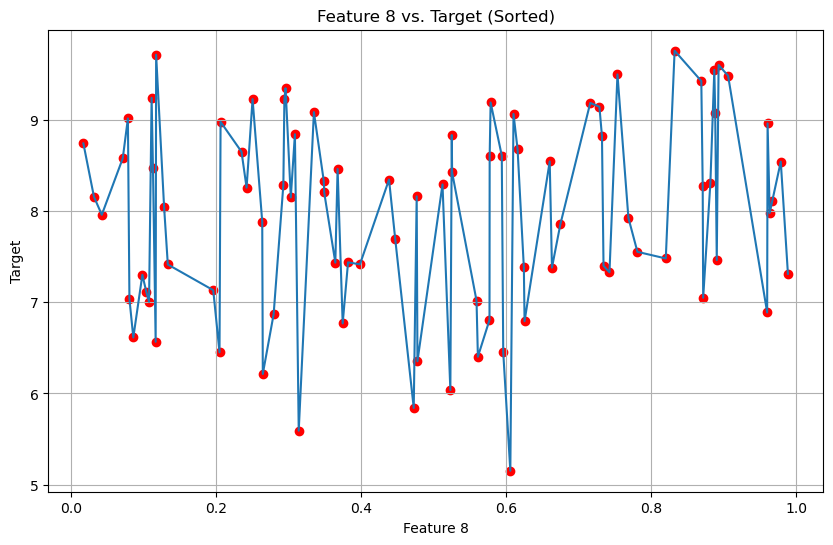

In [73]:
# Sort the DataFrame by 'feature8'
df_sorted = df.sort_values('feature8')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature8'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature8'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 8')
plt.ylabel('Target')
plt.title('Feature 8 vs. Target (Sorted)')
plt.grid(True)
plt.show()

In [75]:
print('Running......')

# Define the parameter grid for the Gaussian Process Regressor
#param_grid = {
#    'kernel': [RBF(length_scale=1.0), RBF(length_scale=0.1), RBF(length_scale=0.5), RBF(length_scale=10.0)],
#    'alpha': [1e-10, 1e-5, 1e-2],
#    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
#    'normalize_y': [True],
#}

param_grid = {
    'kernel': [C(1.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.1, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2)),
               C(10.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))],
    'alpha': [1e-10, 1e-5, 1e-2],
    'n_restarts_optimizer': [5, 9, 10, 15, 20, 50],
    'normalize_y': [True],
}

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(gpr, param_grid, cv=5, scoring='neg_mean_squared_error')

# # Prepare the data
X = df[['feature1', 'feature2', 'feature3', 'feature4']]
y = df['target']
grid_search.fit(X, y)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_gpr = grid_search.best_estimator_

# Use the best estimator to predict the target variable
y_pred = best_gpr.predict(X)

best_gpr

Running......


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: Con

Best parameters: {'alpha': 0.01, 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 9, 'normalize_y': True}
Best score: -0.3867467433304401


GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=True)

In [77]:
gpr = grid_search.best_estimator_
gpr

GaussianProcessRegressor(alpha=0.01, kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


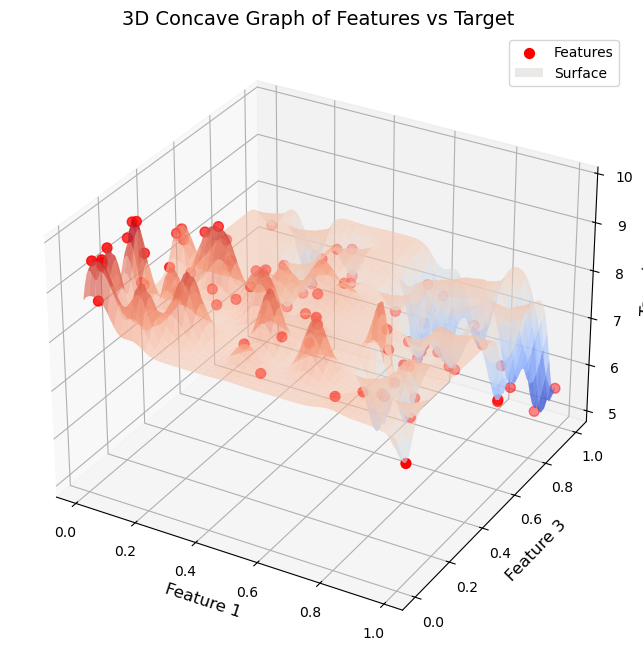

In [79]:
from matplotlib import cm

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of feature1 and feature2
ax.scatter(df['feature1'], df['feature3'], df['target'], c='red', label='Features', marker='o', s=50)


# Create a meshgrid for the surface plot
X, Y = np.meshgrid(np.linspace(df['feature1'].min(), df['feature1'].max(), 100),
                   np.linspace(df['feature3'].min(), df['feature3'].max(), 100))

# Assuming a simple surface for demonstration; replace with your actual model's predictions
# Example using a Gaussian Process Regressor (you can use any suitable model):
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))
#gpr_graph = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(df[['feature1', 'feature2']], df['target'])
gpr.fit(df[['feature1', 'feature3']], df['target'])
#Z = gpr_graph.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
Z = gpr.predict(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.6, label='Surface')

# Customize the plot
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 3', fontsize=12)
ax.set_zlabel('Target', fontsize=12)
ax.set_title('3D Concave Graph of Features vs Target', fontsize=14)
ax.legend()

plt.show()

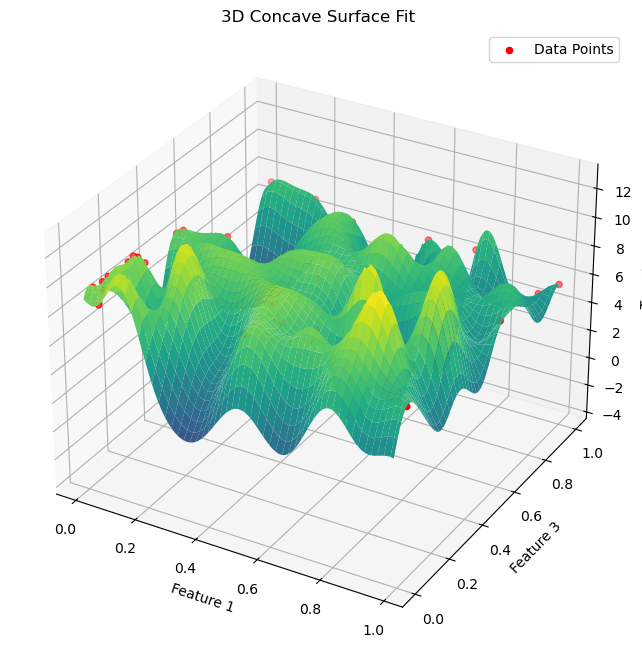

In [81]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature3']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

In [83]:
# Fit a concave surface to the plot above

import numpy as np
from scipy.interpolate import Rbf

# Assuming you have your data in 'feature1', 'feature2', and 'target'
feature1 = df['feature1']
feature2 = df['feature7']
target = df['target']

# Create the radial basis function interpolator
rbfi = Rbf(feature1, feature2, target, function='gaussian') # Try different functions like 'multiquadric', 'inverse', 'gaussian', etc.

# Create a grid of points for the surface
xi = np.linspace(feature1.min(), feature1.max(), 100)
yi = np.linspace(feature2.min(), feature2.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the target values on the grid
zi = rbfi(xi, yi)


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis')

# Plot the original data points
ax.scatter(feature1, feature2, target, c='red', marker='o', label='Data Points')


# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 7')
ax.set_zlabel('Target')
ax.set_title('3D Concave Surface Fit')
ax.legend() # Show the legend for the scatter plot
plt.show()

In [85]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature3']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [87]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature1', 'feature7']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 7')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [89]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.
X = df[['feature3', 'feature7']]
y = df[['target']]

# Create the Gaussian Process Regressor
#kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
#gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(X, y)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 7')

# Show the plot
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


In [91]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 5 at peak of target: {feature7_at_peak}")
print(f"Feature 6 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.04343225
Feature 2 at peak of target: 0.10004702
Feature 3 at peak of target: 0.22342261
Feature 4 at peak of target: 0.01686426
Feature 5 at peak of target: 0.28000728
Feature 6 at peak of target: 0.36384718
Feature 5 at peak of target: 0.32840638
Feature 6 at peak of target: 0.83239639


In [93]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 5 at peak of target: {feature7_at_peak}")
print(f"Feature 6 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.94172092
Feature 2 at peak of target: 0.04551294
Feature 3 at peak of target: 0.95383975
Feature 4 at peak of target: 0.85300803
Feature 5 at peak of target: 0.93944963
Feature 6 at peak of target: 0.99935421
Feature 5 at peak of target: 0.7607375
Feature 6 at peak of target: 0.6056816


In [95]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values  # Use only 'feature1' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
#  Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)


# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


7.95**2 * RBF(length_scale=0.01)


In [97]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


31.6**2 * RBF(length_scale=0.01)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


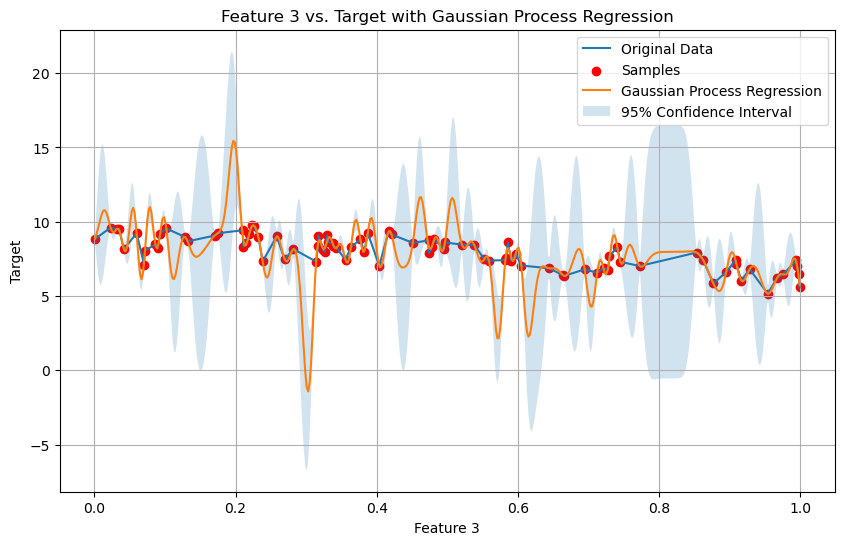

4.13**2 * RBF(length_scale=0.01)


In [99]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature3'
df_sorted = df.sort_values('feature3')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature3']].values  # Use only 'feature3' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature3'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature3'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.title('Feature 3 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


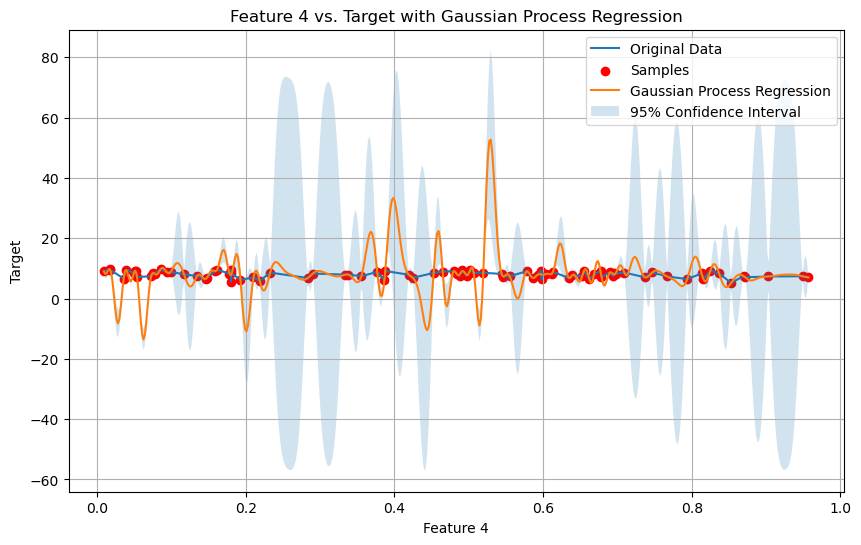

31.6**2 * RBF(length_scale=0.01)


In [101]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature4'
df_sorted = df.sort_values('feature4')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature4']].values  # Use only 'feature4' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature4'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature4'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 4')
plt.ylabel('Target')
plt.title('Feature 4 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


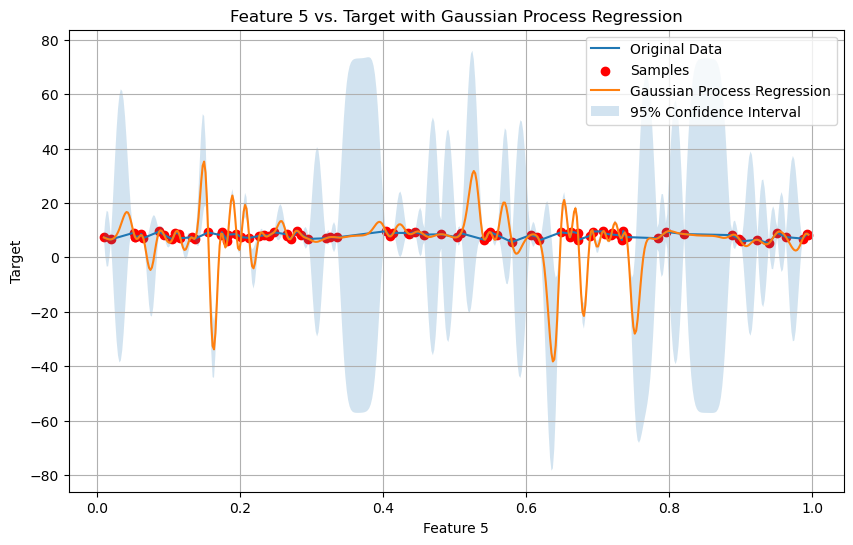

31.6**2 * RBF(length_scale=0.01)


In [103]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature5'
df_sorted = df.sort_values('feature5')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature5']].values  # Use only 'feature5' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature5'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature5'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 5')
plt.ylabel('Target')
plt.title('Feature 5 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


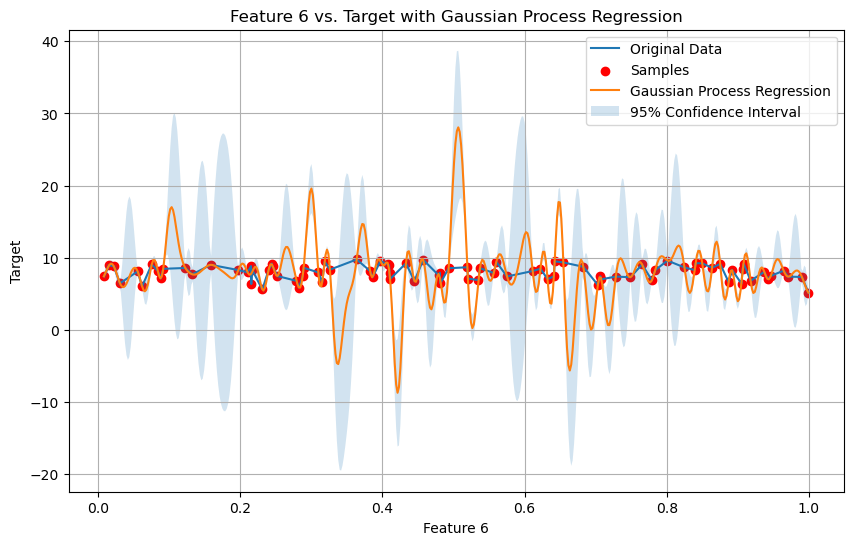

9.64**2 * RBF(length_scale=0.01)


In [105]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature6'
df_sorted = df.sort_values('feature6')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature6']].values  # Use only 'feature6' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature6'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature6'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 6')
plt.ylabel('Target')
plt.title('Feature 6 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


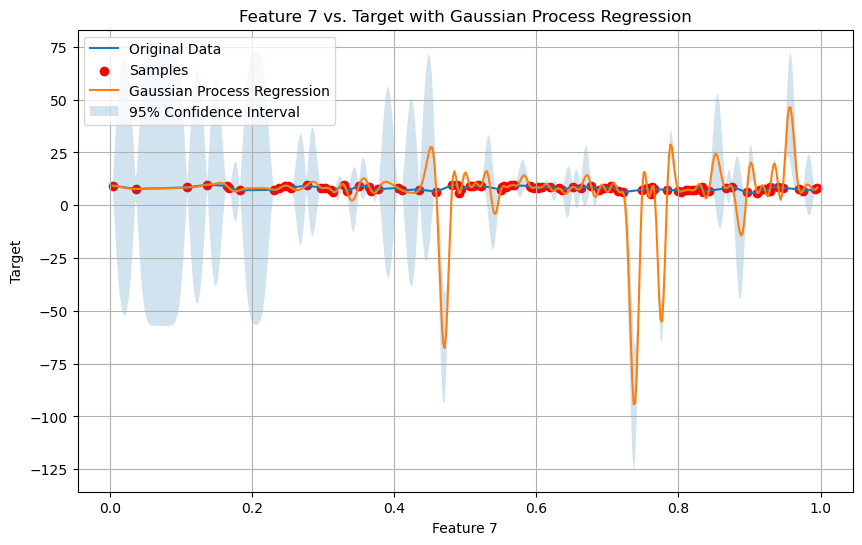

31.6**2 * RBF(length_scale=0.01)


In [107]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature7'
df_sorted = df.sort_values('feature7')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature7']].values  # Use only 'feature7' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature7'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature7'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 7')
plt.ylabel('Target')
plt.title('Feature 7 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


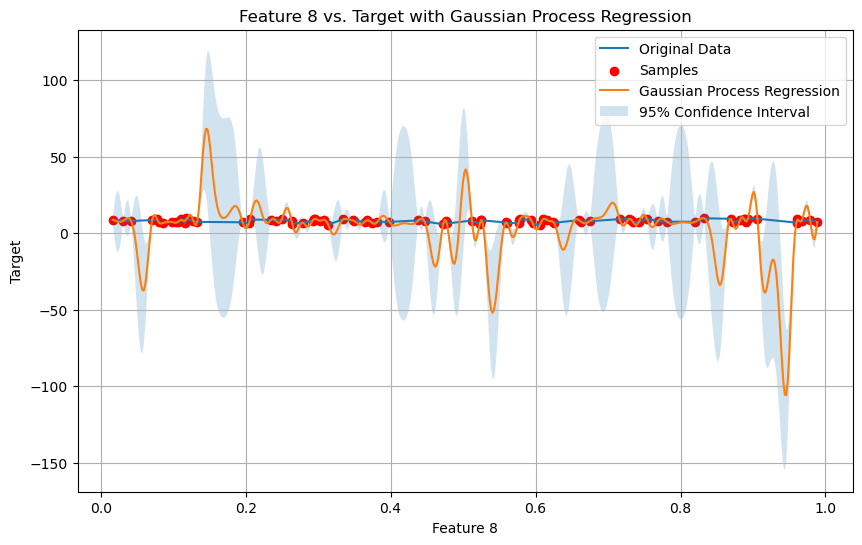

31.6**2 * RBF(length_scale=0.01)


In [109]:
# Assuming df is already defined as in your provided code
# Sort the DataFrame by 'feature8'
df_sorted = df.sort_values('feature8')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature8']].values  # Use only 'feature8' as input
y = df_sorted['target'].values

# Define the kernel with optimized parameters. Experiment with different kernels and parameters
# Consider using a combination of kernels for a more flexible fit
# Increased the number of components and experimented with length_scales
#kernel = 1.0 * RBF(length_scale=0.5) + 0.5 * RBF(length_scale=0.05) + 0.2 * RBF(length_scale=5.0)

# Create and fit the Gaussian Process Regressor. Increase n_restarts_optimizer for better optimization
#gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=50, normalize_y=True, random_state=0) # Increased restarts
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Increased prediction points
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature8'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature8'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 8')
plt.ylabel('Target')
plt.title('Feature 8 vs. Target with Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

print(gpr.kernel_) # Print the optimized kernel

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


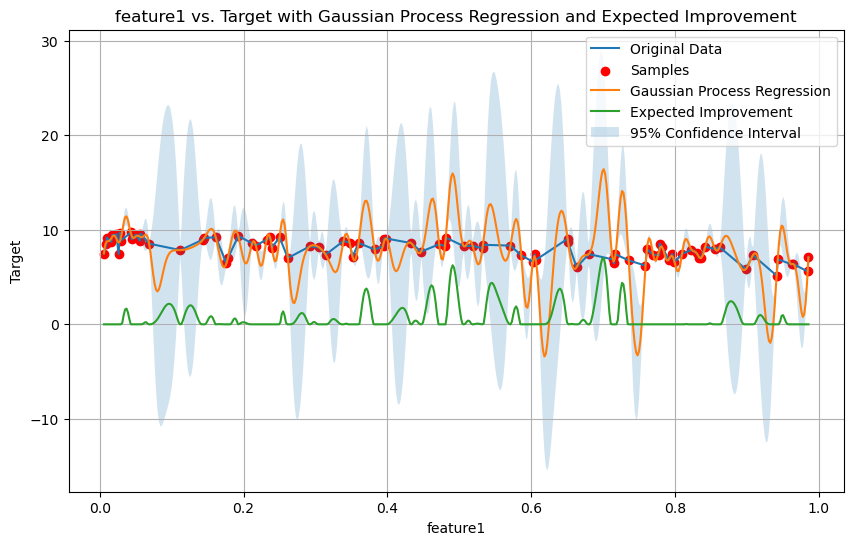

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


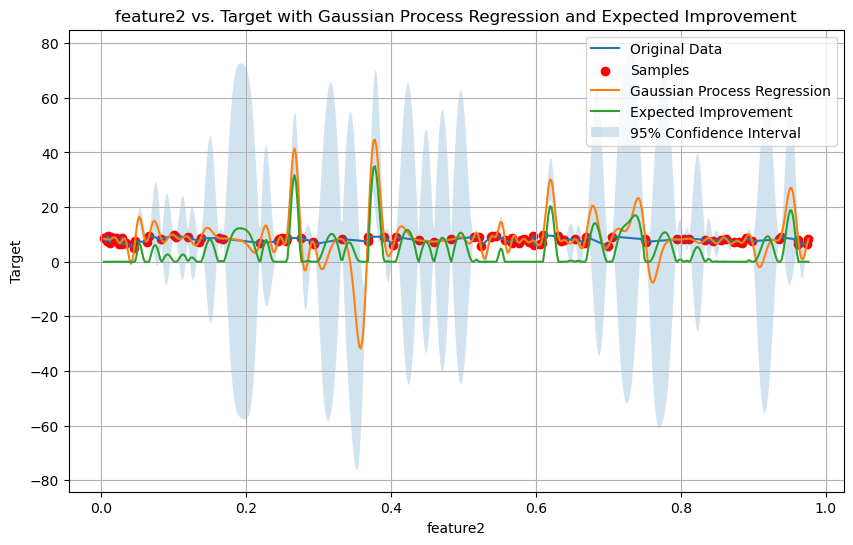

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


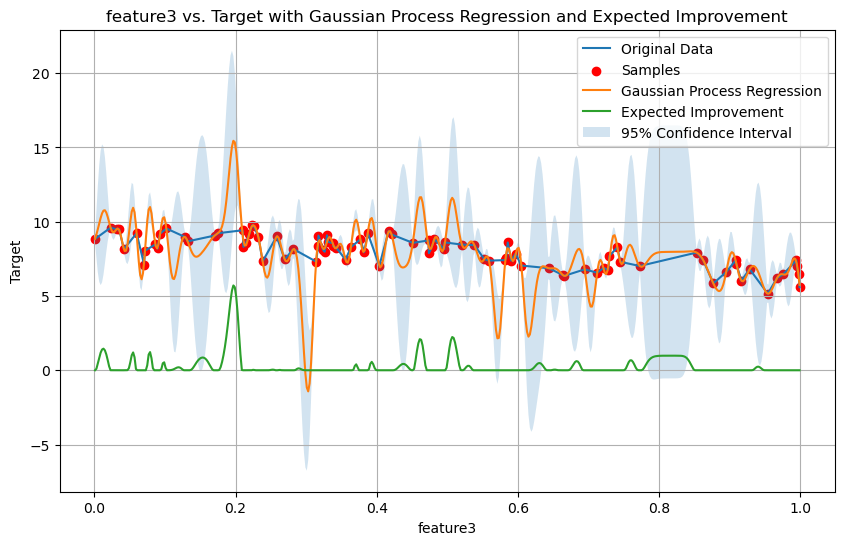

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


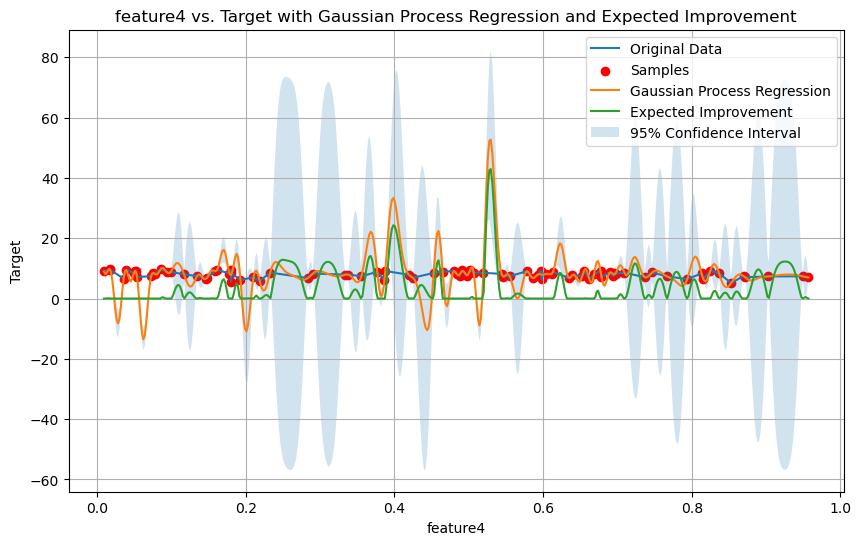

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


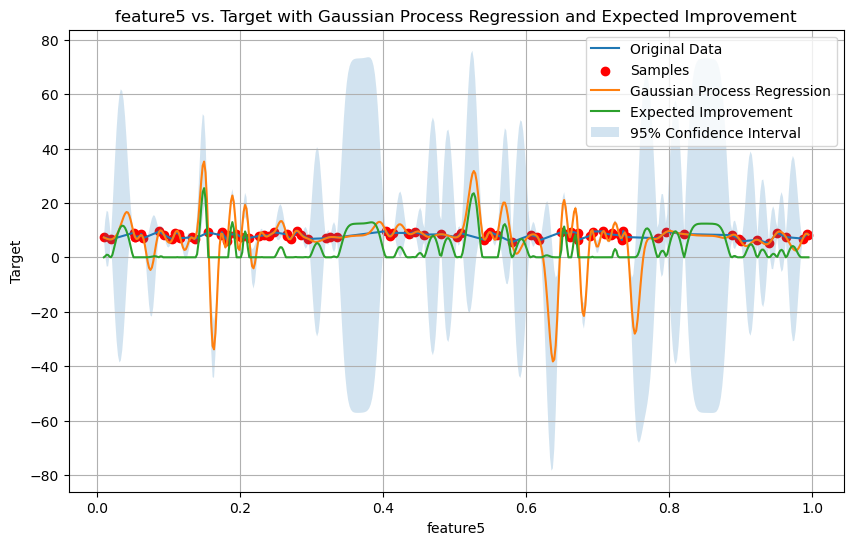

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


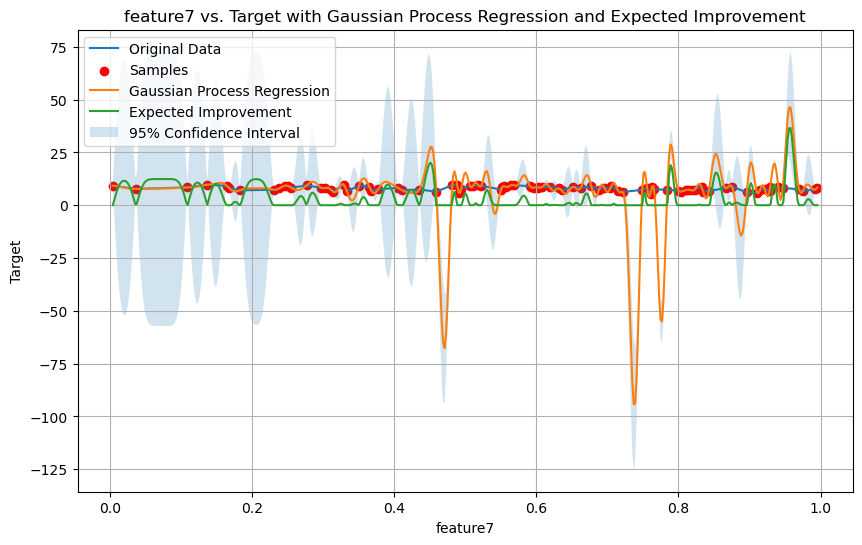

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


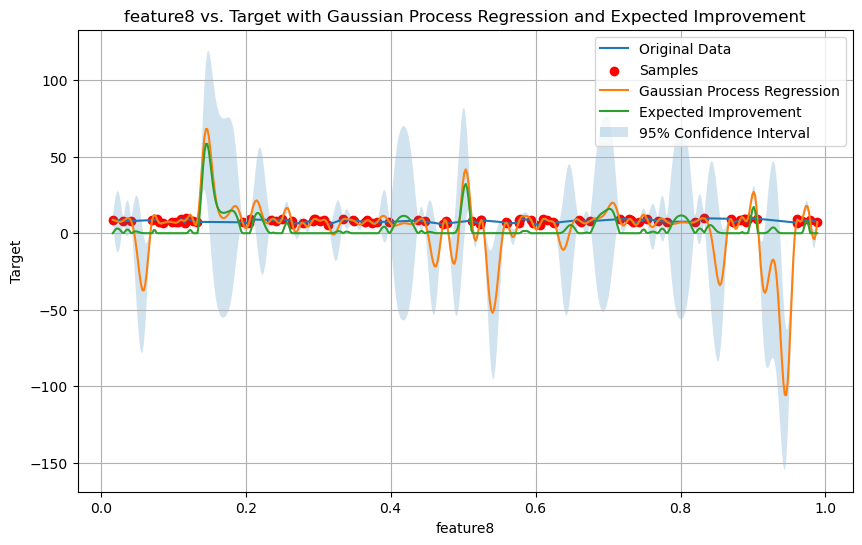

31.6**2 * RBF(length_scale=0.01)

In [111]:
# Assuming df is already defined as in your provided code
from scipy.stats import norm
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Expected Improvement
    y_best = np.max(y)  # Current best observed target value
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)


    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ei, label='Expected Improvement') #Plot EI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and Expected Improvement')
    plt.legend()
    plt.grid(True)
    plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


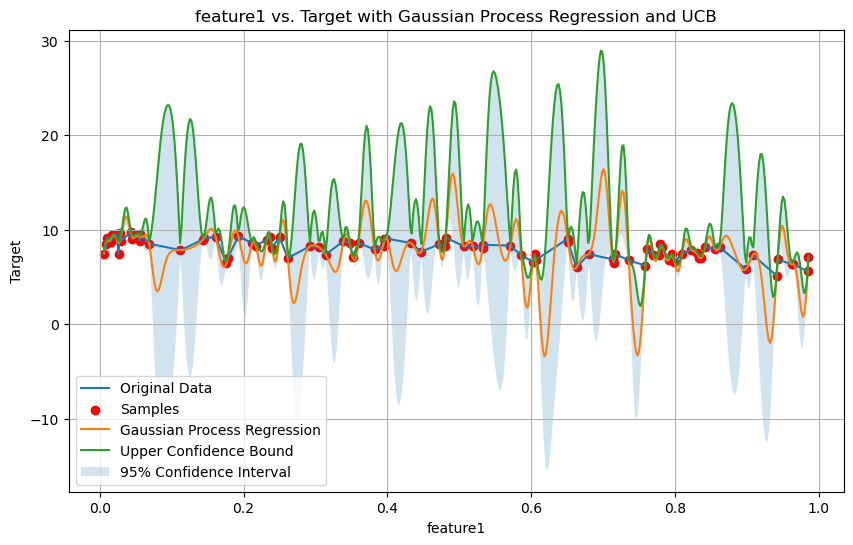

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


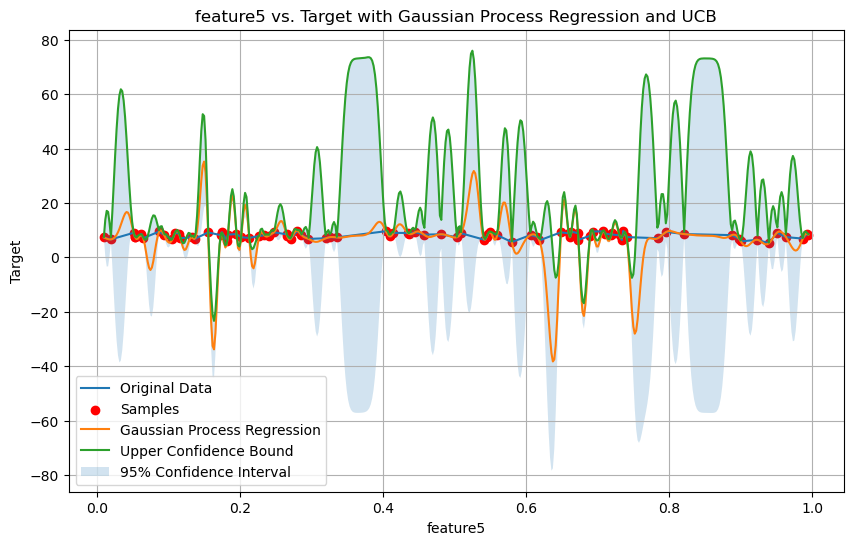

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


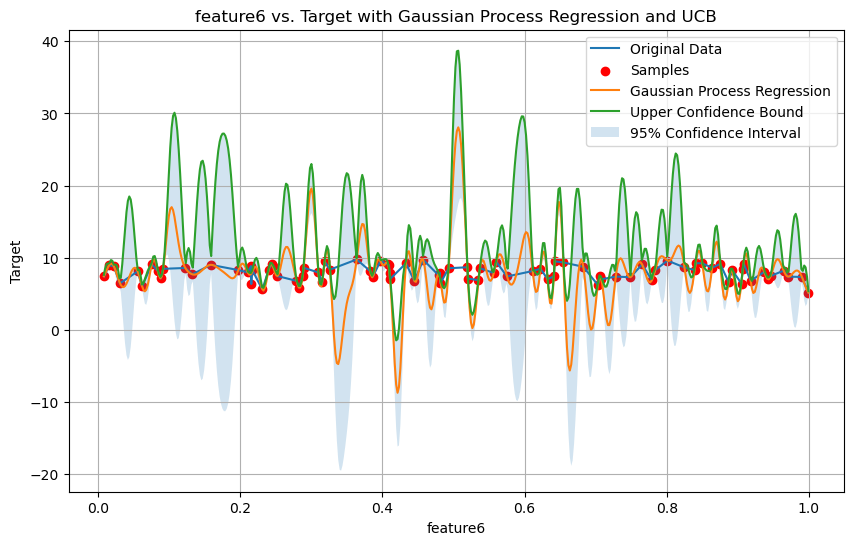

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


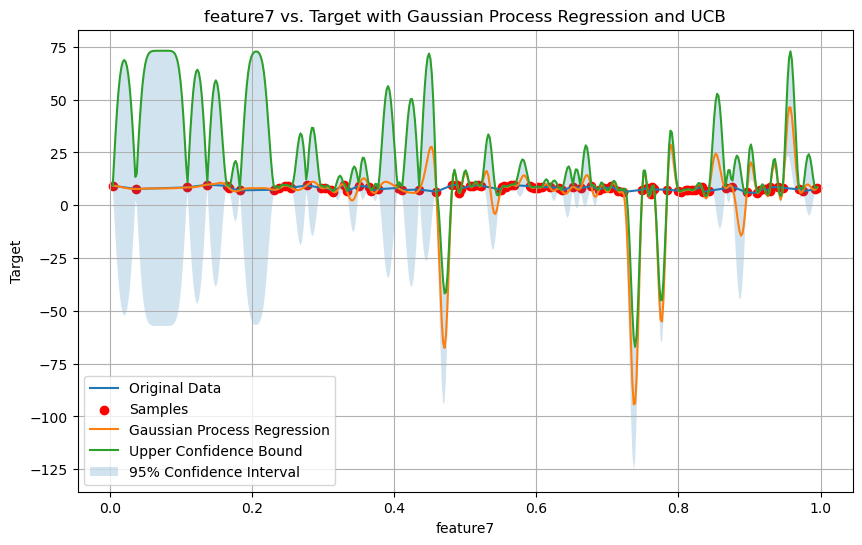

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


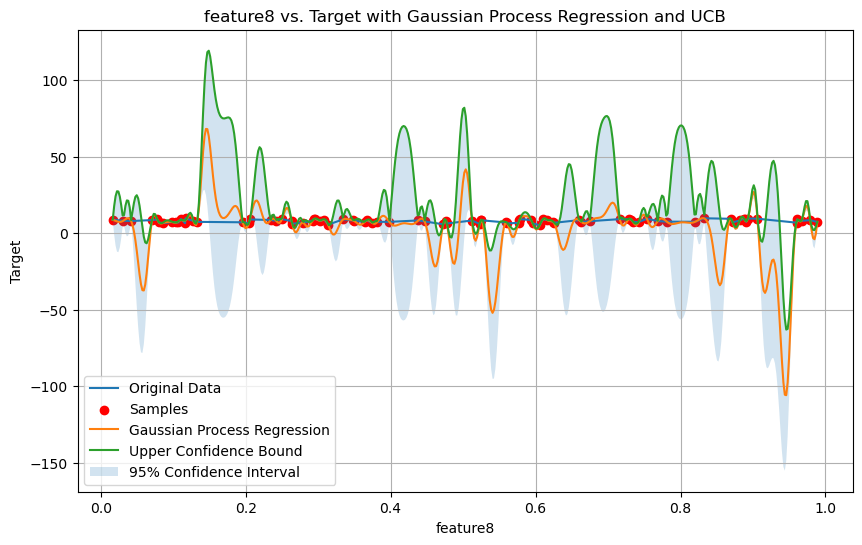

In [113]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Upper Confidence Bound (UCB)
    # Adjust the exploration parameter (kappa) as needed
    kappa = 1.96  # For approximately 95% confidence
    ucb = y_pred + kappa * sigma

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, ucb, label='Upper Confidence Bound')  # Plot UCB
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and UCB')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


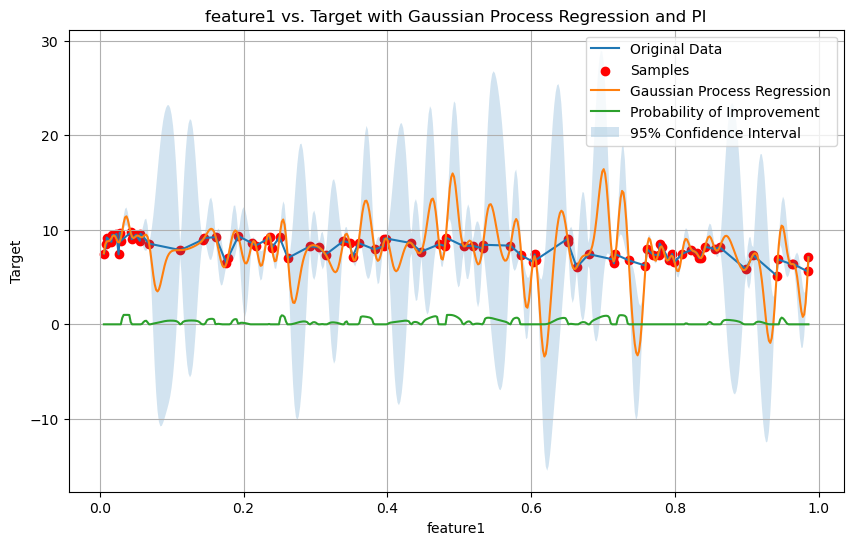

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


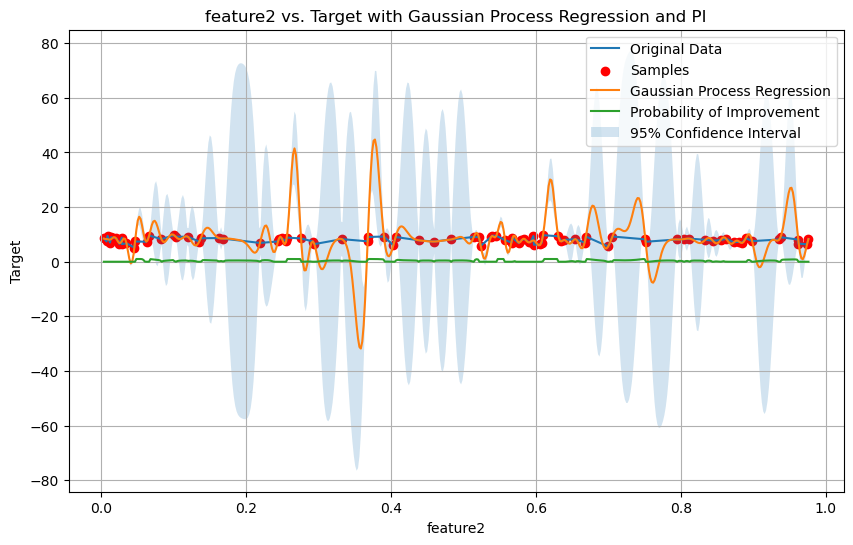

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


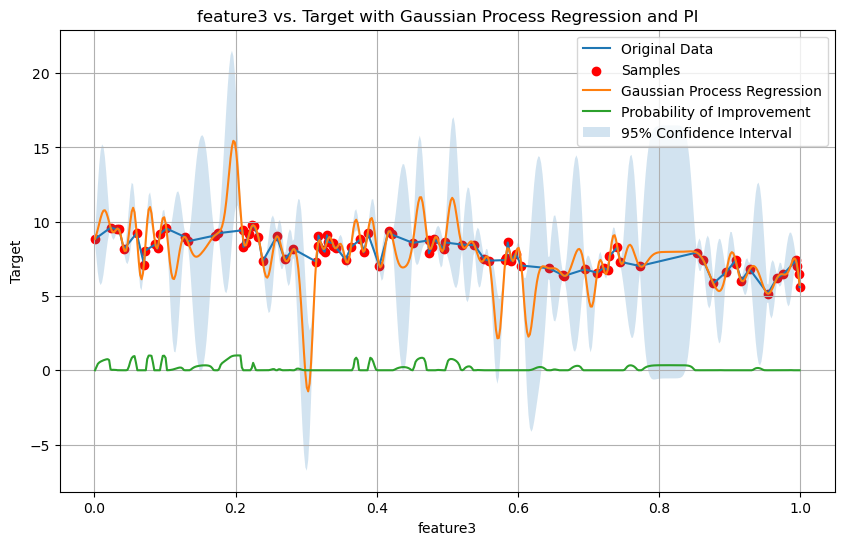

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


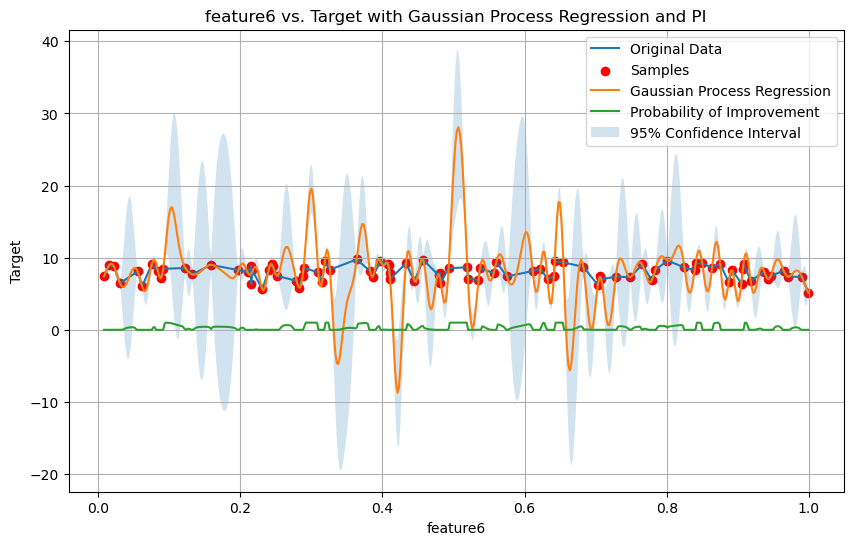

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


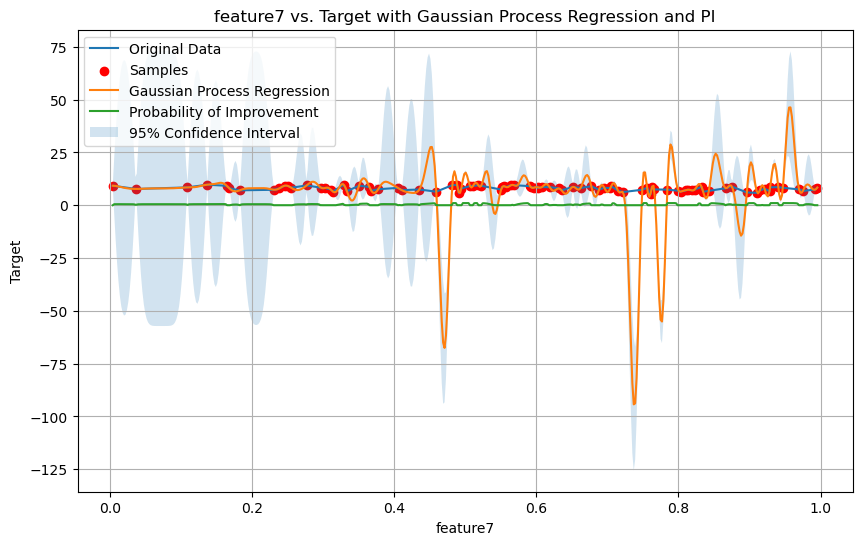

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [115]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)

    # Prepare the data for the Gaussian Process Regressor
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    # Define the kernel 
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)

    # Create and fit the Gaussian Process Regressor
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)

    # Predict target values and their standard deviations
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)

    # Calculate Probability of Improvement (PI)
    y_best = np.max(y)  # Current best observed target value
    xi = 0.01  # Exploration-exploitation trade-off parameter
    pi = norm.cdf((y_pred - y_best - xi) / sigma)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df_sorted[feature], df_sorted['target'], linestyle='-', label='Original Data')
    plt.scatter(df_sorted[feature], df_sorted['target'], color='red', label='Samples')
    plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
    plt.plot(X_pred, pi, label='Probability of Improvement')  # Plot PI
    plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(f'{feature} vs. Target with Gaussian Process Regression and PI')
    plt.legend()
    plt.grid(True)
    plt.show()

In [117]:
print('Running.........')

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    y_best = np.max(y)

    # Calculate Expected Improvement
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    best_ei_index = np.argmax(ei)
    best_ei_feature_value = X_pred[best_ei_index][0]
    print(f"For {feature}, best feature1 value for Expected Improvement: {best_ei_feature_value}")


    #Calculate Upper Confidence Bound
    kappa = 1.96
    ucb = y_pred + kappa * sigma
    best_ucb_index = np.argmax(ucb)
    best_ucb_feature_value = X_pred[best_ucb_index][0]
    print(f"For {feature}, best feature1 value for Upper Confidence Bound: {best_ucb_feature_value}")

    # Calculate Probability of Improvement
    xi = 0.01
    pi = norm.cdf((y_pred - y_best - xi) / sigma)
    best_pi_index = np.argmax(pi)
    best_pi_feature_value = X_pred[best_pi_index][0]
    print(f"For {feature}, best {feature} value for Probability of Improvement: {best_pi_feature_value}")

Running.........
For feature1, best feature1 value for Expected Improvement: 0.7010581016232464
For feature1, best feature1 value for Upper Confidence Bound: 0.697128621783567
For feature1, best feature1 value for Probability of Improvement: 0.036976008717434866


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


For feature2, best feature1 value for Expected Improvement: 0.3776002890981964
For feature2, best feature1 value for Upper Confidence Bound: 0.7303436371543086
For feature2, best feature2 value for Probability of Improvement: 0.6114632822845691
For feature3, best feature1 value for Expected Improvement: 0.1968551798997996
For feature3, best feature1 value for Upper Confidence Bound: 0.19485510428857714
For feature3, best feature3 value for Probability of Improvement: 0.20485548234468934


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455:

For feature4, best feature1 value for Expected Improvement: 0.5295205469138277
For feature4, best feature1 value for Upper Confidence Bound: 0.5295205469138277
For feature4, best feature4 value for Probability of Improvement: 0.6738864459118237
For feature5, best feature1 value for Expected Improvement: 0.14981573114228458
For feature5, best feature1 value for Upper Confidence Bound: 0.5249101215230462
For feature5, best feature5 value for Probability of Improvement: 0.18535098917835674
For feature6, best feature1 value for Expected Improvement: 0.5067628681162325
For feature6, best feature1 value for Upper Confidence Bound: 0.5067628681162325
For feature6, best feature6 value for Probability of Improvement: 0.6458007468737476
For feature7, best feature1 value for Expected Improvement: 0.9577081474148296
For feature7, best feature1 value for Upper Confidence Bound: 0.07678999661322644
For feature7, best feature7 value for Probability of Improvement: 0.482449822264529
For feature8, best

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455:

In [119]:
for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values

    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    y_best = np.max(y)

    # Calculate Expected Improvement
    ei = (y_pred - y_best - 0.01) * norm.cdf((y_pred - y_best) / sigma) + sigma * norm.pdf((y_pred - y_best) / sigma)
    best_ei_index = np.argmax(ei)
    best_ei_feature_value = X_pred[best_ei_index][0]
    print(f"For {feature}, best feature value for Expected Improvement: {best_ei_feature_value:.6f}")


    #Calculate Upper Confidence Bound
    kappa = 1.96
    ucb = y_pred + kappa * sigma
    best_ucb_index = np.argmax(ucb)
    best_ucb_feature_value = X_pred[best_ucb_index][0]
    print(f"For {feature}, best feature value for Upper Confidence Bound: {best_ucb_feature_value:.6f}")

    # Calculate Probability of Improvement
    xi = 0.01
    pi = norm.cdf((y_pred - y_best - xi) / sigma)
    best_pi_index = np.argmax(pi)
    best_pi_feature_value = X_pred[best_pi_index][0]
    print(f"For {feature}, best feature value for Probability of Improvement: {best_pi_feature_value:.6f}")

    #Create a new data array (example)
    new_data = np.array([best_ei_feature_value, best_ucb_feature_value, best_pi_feature_value])
    print(f"New Data Array for {feature}: {new_data}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


For feature1, best feature value for Expected Improvement: 0.701058
For feature1, best feature value for Upper Confidence Bound: 0.697129
For feature1, best feature value for Probability of Improvement: 0.036976
New Data Array for feature1: [0.7010581  0.69712862 0.03697601]
For feature2, best feature value for Expected Improvement: 0.377600
For feature2, best feature value for Upper Confidence Bound: 0.730344
For feature2, best feature value for Probability of Improvement: 0.611463
New Data Array for feature2: [0.37760029 0.73034364 0.61146328]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455:

For feature3, best feature value for Expected Improvement: 0.196855
For feature3, best feature value for Upper Confidence Bound: 0.194855
For feature3, best feature value for Probability of Improvement: 0.204855
New Data Array for feature3: [0.19685518 0.1948551  0.20485548]
For feature4, best feature value for Expected Improvement: 0.529521
For feature4, best feature value for Upper Confidence Bound: 0.529521
For feature4, best feature value for Probability of Improvement: 0.673886
New Data Array for feature4: [0.52952055 0.52952055 0.67388645]
For feature5, best feature value for Expected Improvement: 0.149816
For feature5, best feature value for Upper Confidence Bound: 0.524910
For feature5, best feature value for Probability of Improvement: 0.185351
New Data Array for feature5: [0.14981573 0.52491012 0.18535099]
For feature6, best feature value for Expected Improvement: 0.506763
For feature6, best feature value for Upper Confidence Bound: 0.506763
For feature6, best feature value f

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455:

In [121]:
best_feature_values = {}

for feature in ['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    #kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    #gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    
    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445:

Single Best Values for Each Feature (6 significant figures):
feature1: 0.701058
feature2: 0.377600
feature3: 0.196855
feature4: 0.529521
feature5: 0.149816
feature6: 0.506763
feature7: 0.957708
feature8: 0.145110

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:455:

array([0.7010581 , 0.37760029, 0.19685518, 0.52952055, 0.14981573,
       0.50676287, 0.95770815, 0.14511022])

In [123]:
inputs

array([[6.0499445e-01, 2.9221502e-01, 9.0845275e-01, 3.5550624e-01,
        2.0166872e-01, 5.7533801e-01, 3.1031095e-01, 7.3428138e-01],
       [1.7800696e-01, 5.6622265e-01, 9.9486184e-01, 2.1032501e-01,
        3.2015266e-01, 7.0790879e-01, 6.3538449e-01, 1.0713163e-01],
       [9.0769800e-03, 8.1162615e-01, 5.2052036e-01, 7.5686680e-02,
        2.6511183e-01, 9.1651690e-02, 5.9241515e-01, 3.6732026e-01],
       [5.0602816e-01, 6.5373012e-01, 3.6341078e-01, 1.7798105e-01,
        9.3728300e-02, 1.9742533e-01, 7.5582690e-01, 2.9247234e-01],
       [3.5990926e-01, 2.4907568e-01, 4.9599717e-01, 7.0921498e-01,
        1.1498719e-01, 2.8920692e-01, 5.5729515e-01, 5.9388173e-01],
       [7.7881834e-01, 3.4195000e-03, 3.3798313e-01, 5.1952778e-01,
        8.2090699e-01, 5.3724669e-01, 5.5134710e-01, 6.6003209e-01],
       [9.0864932e-01, 6.2249700e-02, 2.3825955e-01, 7.6660355e-01,
        1.3233596e-01, 9.9024381e-01, 6.8806782e-01, 7.4249594e-01],
       [5.8637144e-01, 8.8073573e-01, 7.4

In [125]:
# Add the new data points
next_inputs = np.vstack([inputs, new_data_array])

len(next_inputs), len(inputs)

(89, 88)

In [127]:
next_inputs

array([[6.04994450e-01, 2.92215020e-01, 9.08452750e-01, 3.55506240e-01,
        2.01668720e-01, 5.75338010e-01, 3.10310950e-01, 7.34281380e-01],
       [1.78006960e-01, 5.66222650e-01, 9.94861840e-01, 2.10325010e-01,
        3.20152660e-01, 7.07908790e-01, 6.35384490e-01, 1.07131630e-01],
       [9.07698000e-03, 8.11626150e-01, 5.20520360e-01, 7.56866800e-02,
        2.65111830e-01, 9.16516900e-02, 5.92415150e-01, 3.67320260e-01],
       [5.06028160e-01, 6.53730120e-01, 3.63410780e-01, 1.77981050e-01,
        9.37283000e-02, 1.97425330e-01, 7.55826900e-01, 2.92472340e-01],
       [3.59909260e-01, 2.49075680e-01, 4.95997170e-01, 7.09214980e-01,
        1.14987190e-01, 2.89206920e-01, 5.57295150e-01, 5.93881730e-01],
       [7.78818340e-01, 3.41950000e-03, 3.37983130e-01, 5.19527780e-01,
        8.20906990e-01, 5.37246690e-01, 5.51347100e-01, 6.60032090e-01],
       [9.08649320e-01, 6.22497000e-02, 2.38259550e-01, 7.66603550e-01,
        1.32335960e-01, 9.90243810e-01, 6.88067820e-01, 7.

In [129]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=8)

print("New Input Data (with noise):", new_input_data)
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.70152825 0.383302   0.21348385 0.52463676 0.14594062 0.49152593
 0.95822875 0.14575997]
New Input Data (with noise): [0.701528, 0.383302, 0.213484, 0.524637, 0.145941, 0.491526, 0.958229, 0.14576]


In [131]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmax()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 7 at peak of target: {feature7_at_peak}")
print(f"Feature 8 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.04343225
Feature 2 at peak of target: 0.10004702
Feature 3 at peak of target: 0.22342261
Feature 4 at peak of target: 0.01686426
Feature 5 at peak of target: 0.28000728
Feature 6 at peak of target: 0.36384718
Feature 7 at peak of target: 0.32840638
Feature 8 at peak of target: 0.83239639


In [133]:
# Find the index of the maximum value in the 'target' column
peak_index = df['target'].idxmin()

# Access the values of 'feature1' and 'feature2' at that index
feature1_at_peak = df.loc[peak_index, 'feature1']
feature2_at_peak = df.loc[peak_index, 'feature2']
feature3_at_peak = df.loc[peak_index, 'feature3']
feature4_at_peak = df.loc[peak_index, 'feature4']
feature5_at_peak = df.loc[peak_index, 'feature5']
feature6_at_peak = df.loc[peak_index, 'feature6']
feature7_at_peak = df.loc[peak_index, 'feature7']
feature8_at_peak = df.loc[peak_index, 'feature8']

print(f"Feature 1 at peak of target: {feature1_at_peak}")
print(f"Feature 2 at peak of target: {feature2_at_peak}")
print(f"Feature 3 at peak of target: {feature3_at_peak}")
print(f"Feature 4 at peak of target: {feature4_at_peak}")
print(f"Feature 5 at peak of target: {feature5_at_peak}")
print(f"Feature 6 at peak of target: {feature6_at_peak}")
print(f"Feature 8 at peak of target: {feature7_at_peak}")
print(f"Feature 8 at peak of target: {feature8_at_peak}")

Feature 1 at peak of target: 0.94172092
Feature 2 at peak of target: 0.04551294
Feature 3 at peak of target: 0.95383975
Feature 4 at peak of target: 0.85300803
Feature 5 at peak of target: 0.93944963
Feature 6 at peak of target: 0.99935421
Feature 8 at peak of target: 0.7607375
Feature 8 at peak of target: 0.6056816


In [135]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.701528, 0.383302, 0.213484, 0.524637, 0.145941, 0.491526, 0.958229, 0.14576]
